In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/WineQT.csv')
df.head()
df.shape

(1143, 13)

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Set a correlation threshold
correlation_threshold = 0.6

# Create a mask to identify features with high correlation
mask = (correlation_matrix > correlation_threshold) & (correlation_matrix < 1.0)



In [ ]:
# Find the columns to drop (features with high correlation)
columns_to_drop = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[mask[col]].tolist()
    columns_to_drop.update(set(correlated_cols))

# Drop the highly correlated features
filtered_df = df.drop(columns=columns_to_drop)



In [ ]:
print("Original Data Shape:", df.shape)
print("Filtered Data Shape:", filtered_df.shape)


Original Data Shape: (1143, 13)
Filtered Data Shape: (1143, 7)


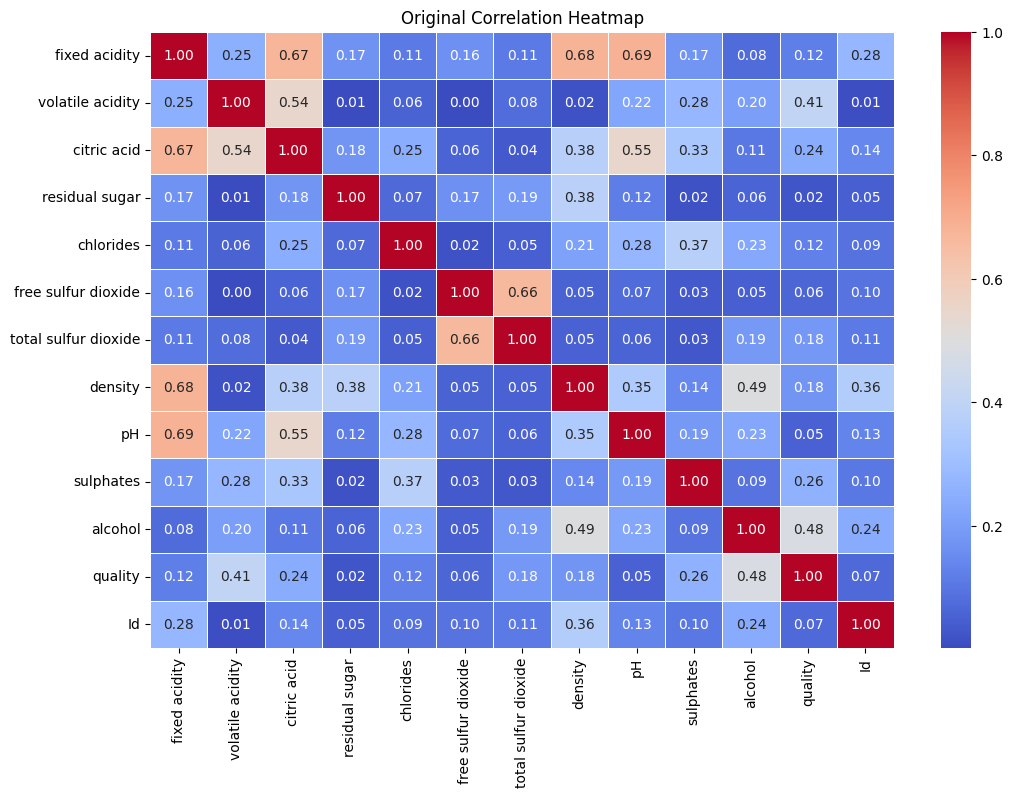

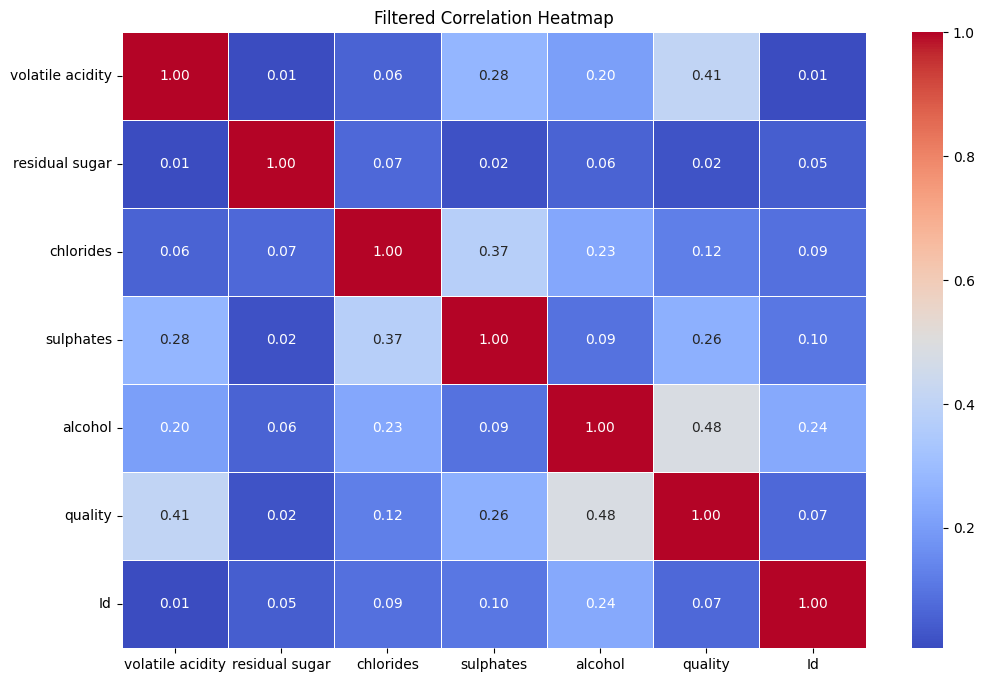

In [ ]:
# Visualize the correlation matrix before and after filtering
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Original Correlation Heatmap")
plt.show()

filtered_correlation_matrix = filtered_df.corr().abs()

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Filtered Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initial DataFrame
X_initial = df.drop('quality', axis=1)
y_initial = df['quality']

# Transformed DataFrame
X_transformed = filtered_df.drop('quality', axis=1)
y_transformed = filtered_df['quality']

# Split the initial data into training and testing sets
X_train_initial, X_test_initial, y_train_initial, y_test_initial = train_test_split(
    X_initial, y_initial, test_size=0.2, random_state=42
)

# Split the transformed data into training and testing sets
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42
)

# Standardize the features using StandardScaler for the initial data
scaler_initial = StandardScaler()
X_train_scaled_initial = scaler_initial.fit_transform(X_train_initial)
X_test_scaled_initial = scaler_initial.transform(X_test_initial)

# Standardize the features using StandardScaler for the transformed data
scaler_transformed = StandardScaler()
X_train_scaled_transformed = scaler_transformed.fit_transform(X_train_transformed)
X_test_scaled_transformed = scaler_transformed.transform(X_test_transformed)

# Train a simple classifier (Logistic Regression) for the initial data
model_initial = LogisticRegression(random_state=42)
model_initial.fit(X_train_scaled_initial, y_train_initial)

# Train a simple classifier (Logistic Regression) for the transformed data
model_transformed = LogisticRegression(random_state=42)
model_transformed.fit(X_train_scaled_transformed, y_train_transformed)

# Make predictions and evaluate the models for the initial data
y_pred_initial = model_initial.predict(X_test_scaled_initial)
accuracy_initial = accuracy_score(y_test_initial, y_pred_initial)
classification_report_str_initial = classification_report(y_test_initial, y_pred_initial)


# Make predictions and evaluate the models for the transformed data
y_pred_transformed = model_transformed.predict(X_test_scaled_transformed)
accuracy_transformed = accuracy_score(y_test_transformed, y_pred_transformed)
classification_report_str_transformed = classification_report(y_test_transformed, y_pred_transformed)


# Display evaluation metrics for the initial data
print("Initial Data Evaluation:")
print(f"Accuracy: {accuracy_initial:.2f}")
print("Classification Report:")
print(classification_report_str_initial)


# Display evaluation metrics for the transformed data
print("\nTransformed Data Evaluation:")
print(f"Accuracy: {accuracy_transformed:.2f}")
print("Classification Report:")
print(classification_report_str_transformed)


Initial Data Evaluation:
Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.63      0.64      0.63        99
           7       0.52      0.50      0.51        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.37      0.37       229
weighted avg       0.62      0.64      0.63       229


Transformed Data Evaluation:
Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.64      0.75      0.69        96
           6       0.58      0.55      0.56        99
           7       0.52      0.46      0.49        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif